# **Project Name** : Random Forest Optimization with Genetic Algorithm

#### **Project Type** - Classification
#### **Contribution** - Individual
#### **Name** - Ahmad Bintang Arif

Dataset
https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

## IMPORT LIBRARY

In [ ]:
pip install deap -q

In [15]:
import numpy as np
import pandas as pd
import random as rnd

#Genetic Algorithm - https://github.com/deap/deap
from deap import base
from deap import creator
from deap import tools

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# machine learning auxiliaries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import make_pipeline

# model generation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

# library for genetic algorithm
import random
from math import sqrt
from deap import algorithms, base, creator, tools
from tqdm import tqdm

## DATA PREPARATION

In [4]:
df = pd.read_csv('./Data/Heart Attack.csv')

In [5]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


## DATA EXPLORATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [7]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


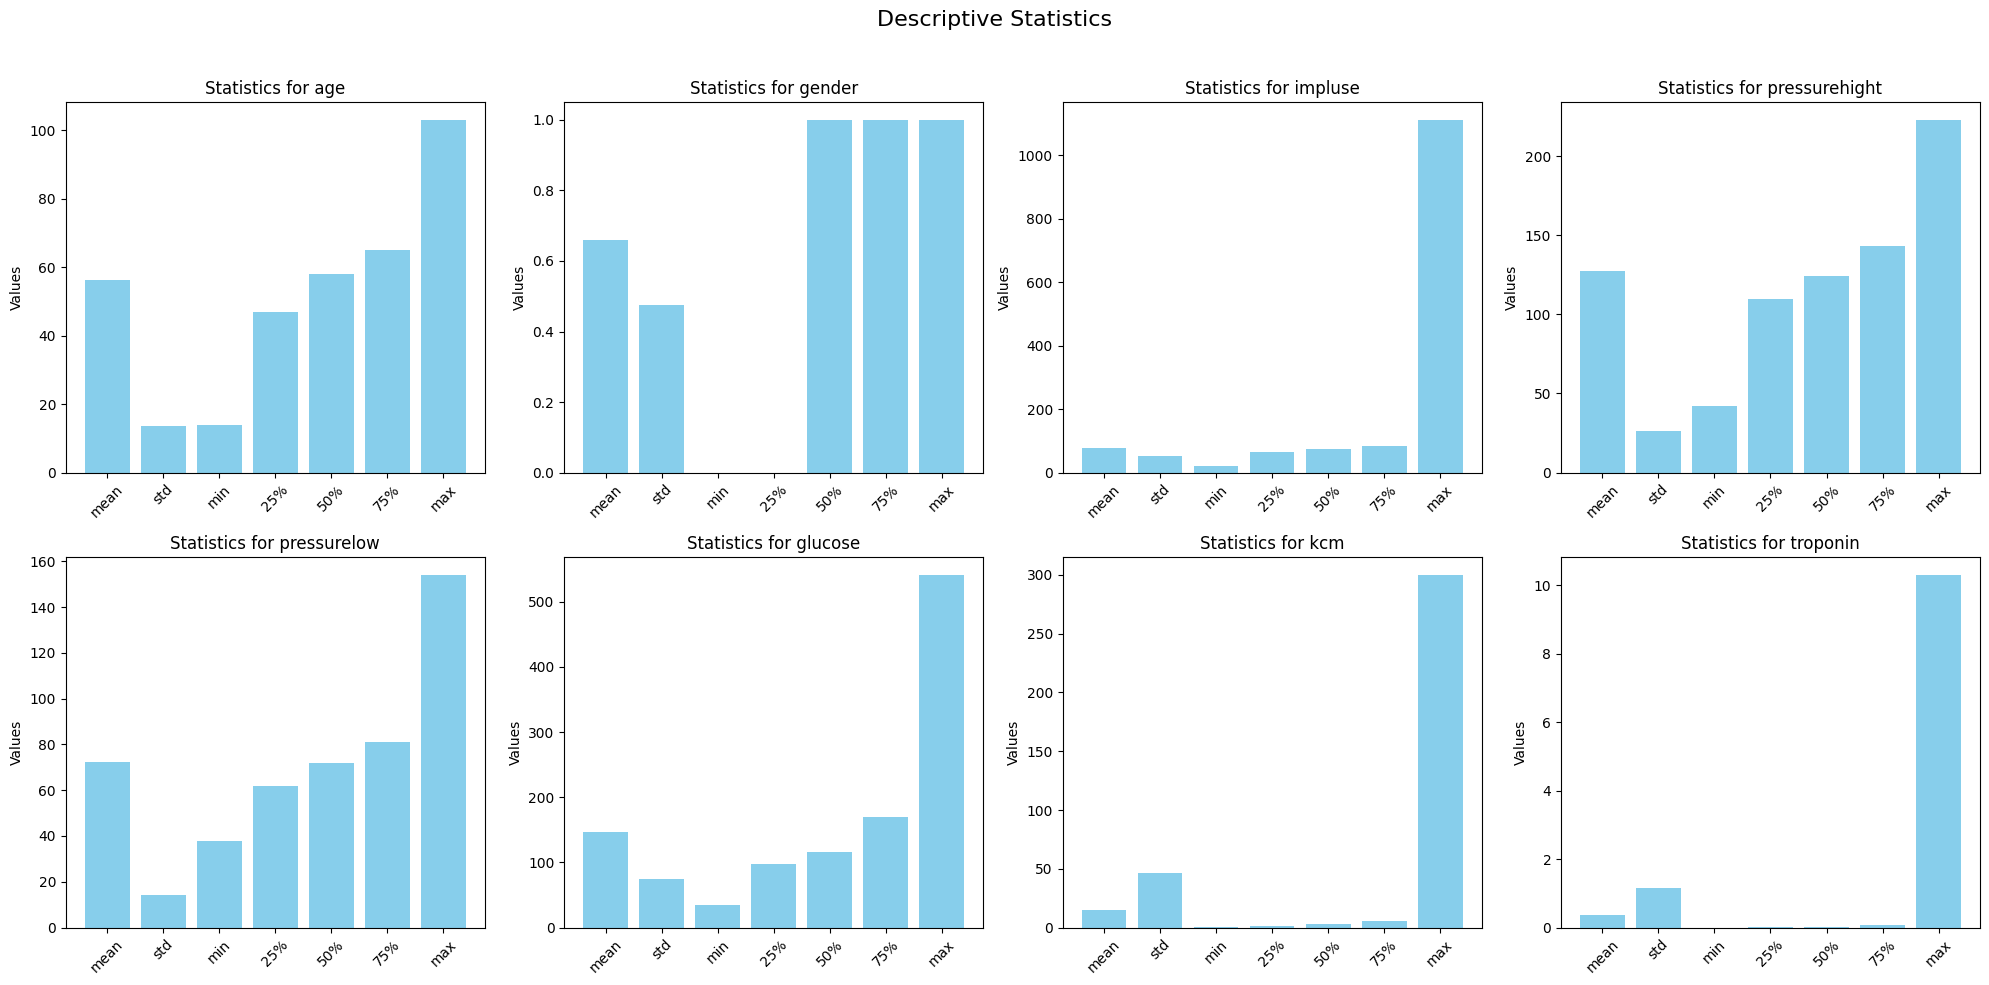

In [80]:
column = df.drop('class', axis=1)
stat = column.describe()

# Exclude the 'count' value from the statistics for all columns
stat = stat.drop(['count'])

# Mengatur ukuran dan grid subplot (2x4)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Descriptive Statistics', fontsize=16)

# Iterate over each column and create bar plots
for i, column in enumerate(stat.columns):
    row_num = i // 4
    col_num = i % 4
    
    # Select column statistics
    column_stats = stat[column]
    
    # Add bar trace to the subplot
    axes[row_num, col_num].bar(column_stats.index, column_stats.values, color='skyblue')
    axes[row_num, col_num].set_title(f'Statistics for {column}')
    axes[row_num, col_num].set_ylabel('Values')
    axes[row_num, col_num].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
#Check null value
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

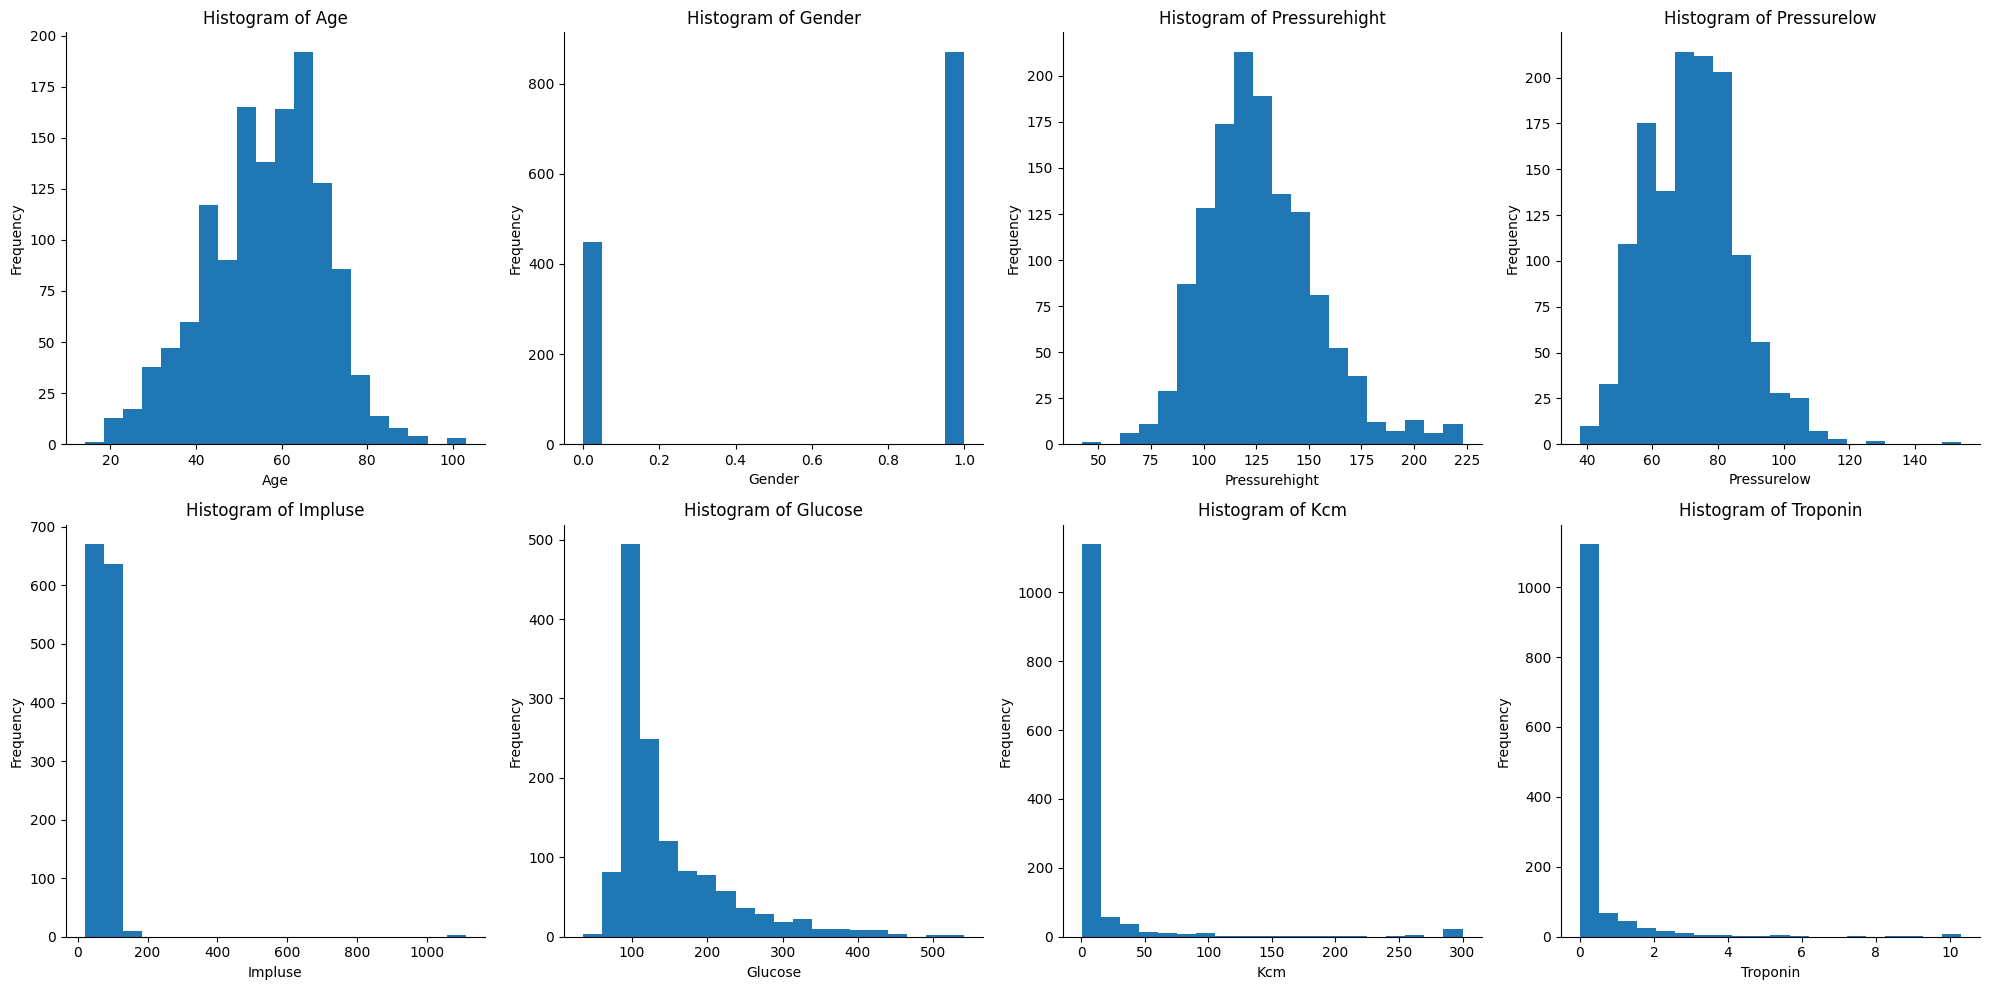

In [9]:
# Kolom yang ingin kita buat histogramnya
columns = ['age', 'gender', 'pressurehight', 'pressurelow', 'impluse', 'glucose', 'kcm', 'troponin']

# Membuat figure dan axis untuk layout 2x4
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Loop melalui kolom dan axis untuk membuat histogram
for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    ax.hist(df[column], bins=20)
    ax.set_title(f'Histogram of {column.capitalize()}')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

      class  gender  size
0  negative       0   202
1  negative       1   307
2  positive       0   247
3  positive       1   563


<Axes: xlabel='gender', ylabel='count'>

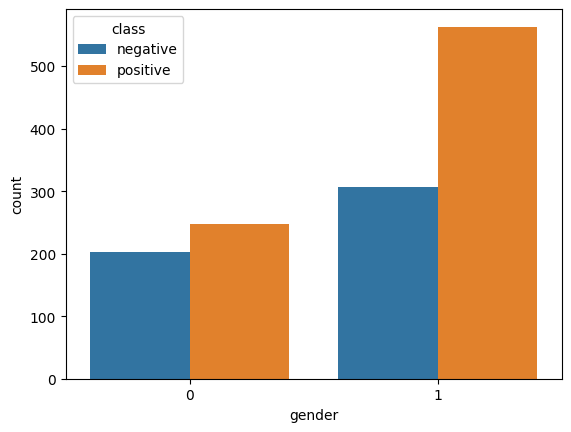

In [10]:
hasil = df.groupby(['class', 'gender'], as_index=False).size()
print(hasil)
sns.countplot(x ='gender', hue = "class", data = df)

## DATA PREPROCESSING

In [11]:
#Normalisasi data
dff = df.drop(columns='class', axis = 1)
d = preprocessing.normalize(dff)
scaled_df = pd.DataFrame(d, columns=dff.columns)
print(scaled_df)

           age    gender   impluse  pressurehight  pressurelow   glucose  \
0     0.248097  0.003877  0.255850       0.620242     0.321751  0.620242   
1     0.063706  0.003034  0.285162       0.297297     0.139547  0.897957   
2     0.164671  0.002994  0.191618       0.479044     0.230540  0.808387   
3     0.202879  0.003170  0.221899       0.380398     0.174349  0.855896   
4     0.162973  0.002963  0.189641       0.331872     0.192604  0.888944   
...        ...       ...       ...            ...          ...       ...   
1314  0.164247  0.003733  0.350891       0.455412     0.250103  0.761509   
1315  0.288692  0.004374  0.367427       0.546766     0.240577  0.651745   
1316  0.187620  0.004169  0.354393       0.700446     0.433610  0.400255   
1317  0.114900  0.002128  0.123411       0.248949     0.144688  0.942603   
1318  0.203388  0.003988  0.374871       0.626115     0.315051  0.534391   

           kcm  troponin  
0     0.006978  0.000047  
1     0.020477  0.003216  
2     

In [12]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['class'] = labelencoder.fit_transform(df['class'])
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


## MODELING BASE

In [13]:
# Separate x and y
x = scaled_df
y = df['class']

In [58]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
# Create model base 
model=RandomForestClassifier().fit(X_train,y_train)
prediction=model.predict(X_test)
# Evaluate model
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[ 97   4]
 [  6 157]]
0.9621212121212122
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.98      0.96      0.97       163

    accuracy                           0.96       264
   macro avg       0.96      0.96      0.96       264
weighted avg       0.96      0.96      0.96       264



## HYPERPARAMETER TUNING WITH GA

In [46]:
# Set up DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("n_estimators", random.randint, 10, 200)
toolbox.register("max_depth", random.randint, 1, 20)
toolbox.register("min_samples_split", random.randint, 2, 20)
toolbox.register("min_samples_leaf", random.randint, 1, 20)

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth, 
                  toolbox.min_samples_split, toolbox.min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [47]:
def evaluate(individual):
    # Extract the hyperparameters
    n_estimators, max_depth, min_samples_split, min_samples_leaf = individual

    # Create the classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)

    # Evaluate the classifier using cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    return np.mean(scores),

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[10, 1, 2, 1], up=[200, 20, 20, 20], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)


In [48]:
def main():
    random.seed(42)
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: ", hof[0])


gen	nevals	avg     	std      	min     	max     
0  	50    	0.945536	0.0562529	0.635071	0.964929
1  	28    	0.958995	0.00387032	0.945972	0.964929
2  	29    	0.96146 	0.00179455	0.957346	0.964929
3  	32    	0.962995	0.00172668	0.958294	0.964929
4  	30    	0.963071	0.00293661	0.954502	0.964929
5  	27    	0.964531	0.00112297	0.958294	0.964929
6  	34    	0.964398	0.00167598	0.95545 	0.964929
7  	19    	0.964569	0.00179735	0.952607	0.964929
8  	33    	0.964796	0.000464745	0.963033	0.964929
9  	27    	0.964531	0.00160959 	0.956398	0.964929
10 	32    	0.964758	0.000675318	0.962085	0.964929
11 	33    	0.957934	0.0424106  	0.661611	0.964929
12 	33    	0.96419 	0.00222125 	0.950711	0.964929
13 	28    	0.964872	0.000294297	0.963033	0.964929
14 	32    	0.964417	0.00199016 	0.952607	0.964929
15 	23    	0.964379	0.00203374 	0.952607	0.964929
16 	28    	0.964379	0.00154115 	0.957346	0.964929
17 	21    	0.964929	1.11022e-16	0.964929	0.964929
18 	28    	0.964303	0.00239501 	0.948815	0.964929
19 	27    	

## TRAIN NEW MODEL WITH HYPERPARAMETER FROM GA

In [50]:
# Create new model with hyperparameter from GA
model=RandomForestClassifier(n_estimators=32, max_depth=15, min_samples_split=13,min_samples_leaf=7).fit(X_train,y_train)
prediction=model.predict(X_test)
# Evaluate model
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[110   2]
 [  5 147]]
0.9734848484848485
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.99      0.97      0.98       152

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264

